# <font color=pink>Prediccion de juegos</font>

Un club del juego de Go recopiló los resultados de varias partidas entre diferentes jugadores, almacenados
en el archivo ___juegos_entrenamiento.txt___, con el objetivo de predecir el resultado de
partidas futuras, ejemplos de las cuales se encuentran en el archivo ___juegos_validacion.txt___. Los archivos ___juegos_entrenamiento.txt___ y ___juegos_validacion.txt___ contienen 3 columnas: la primera
corresponde al identificador del jugador A, la segunda al identificador del jugador B y la tercera
es el resultado de la partida (1 si ganó el jugador A o 0 si ganó el jugador B). En el club hay un
total de D jugadores, por lo que cada identificador es un número entero entre 1 y D. La predicción
del resultado de un juego se puede plantear como un problema de clasificación: dados 2 jugadores
(A y B) se requiere predecir si A ganó $(y = 1)$ o si fue B $(y = 0)$. Realice los siguientes ejercicios:

* Entrena y evalúa un clasificador bayesiano ingenuo. Al ser un modelo generativo (modela la probabilidad conjunta $P(x;y)$), es posible generar partidas artificiales con los parámetros calculados. Genera nuevas partidas que sigan la distribución modelada.

In [1]:
#Importamos librerias utiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import CategoricalNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

#Leemos nuestros datos
train = pd.read_csv('juegos_entrenamiento.txt',header=None,sep='\s+')
validacion = pd.read_csv('juegos_validacion.txt',header=None,sep='\s+')

#Renombramos las columnas de los datos por claridad
train.columns=['ID A','ID B','Resultado']
validacion.columns=['ID A','ID B','Resultado']
#mostramos uno de las bases de datos
validacion

,ID A,ID B,Resultado
0,35,43,1
1,45,9,0
2,55,106,0
3,35,43,1
4,35,43,1
...,...,...,...
110,60,120,1
111,101,43,1
112,55,105,0
113,7,9,0


In [2]:
#Veamos que las bases de datos no vengan incompletas
validacion.info()
train.info()
#dado que las tres columnas de las dos db son non-null y de tipo int64, entonces decimos que no estan incompletas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID A       115 non-null    int64
 1   ID B       115 non-null    int64
 2   Resultado  115 non-null    int64
dtypes: int64(3)
memory usage: 2.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID A       319 non-null    int64
 1   ID B       319 non-null    int64
 2   Resultado  319 non-null    int64
dtypes: int64(3)
memory usage: 7.6 KB


In [3]:
#creamos nuestros arrays de x e y para train y validacion
xTrain = (train.drop(columns=['Resultado'])).to_numpy()
yTrain = (train['Resultado']).to_numpy()
xValid = (validacion.drop(columns=['Resultado'])).to_numpy()
yValid = (validacion['Resultado']).to_numpy()

In [4]:
naiveCat = CategoricalNB(alpha=20)
naiveCat.fit(xTrain,yTrain)
prediccion = naiveCat.predict(xValid)

#usamos la funcion accuracy_score entre las variables prediccion e yValid
#tal y como fueron definidos. Esta funcion muestra el porcentaje de clasificaciones buenas
#que hace el modelo con respecto a todas las muestras
print(accuracy_score(prediccion,yValid))

0.7304347826086957


Ya que tenemos nuestro Bayes entrenado y con un accuracy decente (73%) lo que vamos a hacer es buscar el maximo y el minimo del ID, para con un generador de nuemeros aleatorios crear partidas aleatorias, es decir generar datos de forma aleatoria un nuevo array de dos columnas que contengan los ID de tal forma que los ID de ambas columnas sean diferentes. Posteriormente a este nuevo array vamos a pasarle un predict de nuestro modelo ya entrenado, que generara los resultados artificiales y con esto terminaremos la tarea de generar datos artificiales para partidas artificiales 

In [5]:
#Obtenemos los valores maximo y minimo de los ID
maxTrain = train.max()
maxValid = validacion.max()
print(maxTrain)
print(maxValid)
#El ID maximo es 142
minTrain = train.min()
minValid = validacion.min()
print(minTrain)
print(minValid)
#El ID minimo es 1

ID A         142
ID B         141
Resultado      1
dtype: int64
ID A         132
ID B         136
Resultado      1
dtype: int64
ID A         1
ID B         1
Resultado    0
dtype: int64
ID A         4
ID B         4
Resultado    0
dtype: int64


In [6]:
#Generaremos 150 partidas artificiales. para ello creamos un array numpy de ceros de 150filasx2columnas
artificiales = np.zeros((150,2),dtype=int)
#rellenamos los valores de los jugadores A,B con un ciclo for y un generador de numeros pseudo aleatorios
for i in range(artificiales.shape[0]):
    #metemos i semillas para obtener reproducibilidad
    np.random.seed(i)
    #creamos dos numeros enteros aleatorios entre [0,143),  y los asignamos a la variable jugador
    jugadorA = np.random.randint(1,143)
    jugadorB = np.random.randint(1,142)
    #si ambos valores son diferentes
    if jugadorA != jugadorB:
        #asigna a la fila i columna 0 el id del jugador A
        artificiales[i][0] = jugadorA
        #asigna a la fila i columna 1 el id del jugador B
        artificiales[i][1] = jugadorB
    #Si ambos ID son iguales, esto no es posible porque un jugador no puede jugar contra el mismo
    else:
        #escribe 0 en ambas columnas, esto nos servira para buscar posibles juegos que no son factibles y poder cambiarlos
        artificiales[i][0] = 0
        artificiales[i][1] = 0

In [7]:
#Buscamos en el array todos aquellos indices que contienen 0,0
partidasInvalid = np.where(artificiales==0)
#la salida nos dice que en la fila 82 tenemos unicamente una partida invalida en el array artificiales
partidasInvalid

(array([82, 82], dtype=int64), array([0, 1], dtype=int64))

In [8]:
#asignamos manualmente una partida valida
artificiales[82][0] = 25
artificiales[82][1] = 114
#comprobamos que realmente no hay otras partidas invalidas con la misma instruccion anterior
#Buscamos en el array todos aquellos indices que contienen 0,0
partidasInvalid = np.where(artificiales==0)
#la salida nos dice que en la fila 82 tenemos unicamente una partida invalida en el array artificiales
partidasInvalid

(array([], dtype=int64), array([], dtype=int64))

In [9]:
#Usamos nuestro Naive entrenado para generar los resultados de las partidas artificiales
resultadoArtificiales = naiveCat.predict(artificiales)

In [10]:
#creamos un nuevo dataFrame con las columnas ID A e ID B a partir de los datos 'artificiales'
juegosArtificiales = pd.DataFrame(data=artificiales, columns=['ID A', 'ID B'])
#le pegamos la columna de la prediccion del modelo
juegosArtificiales['Resultado'] = resultadoArtificiales
#mostramos nuestro nuevo dataframe
juegosArtificiales

,ID A,ID B,Resultado
0,48,118,1
1,38,141,1
2,16,73,1
3,107,132,1
4,123,130,0
...,...,...,...
145,38,107,1
146,99,29,1
147,24,31,1
148,84,20,1


* Entrena y evalúa un clasificador de regresión logística (a mano). Para esto es necesario reparametrizar las entradas. Explica el procedimiento y la lógica de la reparametrización que realizaste. Selecciona y visualiza los valores de los parámetros.Grafica las curvas ROC y de precisión-exhaustividad y reporta sus áreas bajo la curva.

In [11]:
#Creamos un nuevo dataframe a partir de los dato entrenamiento que llamaremos prueba
#este nuevo df vendra ordenado por los valores de la columna ID A e IDB, ojo este ordenamiento
#no cambia los valores de cada columna y cada fila del df original todo esto se hace para comprobacion visual
prueba = train.sort_values(by=['ID A', 'ID B'])
#reseteamos los indices del nuevo df, pandas agregara una nueva columna index que contendra el valor de la
#fila original en el df train, de nuevo esto se hace como comprobacion visual para ver que el sort no arruino
#los datos originales
prueba = prueba.reset_index()
#guardamos el nuevo df a un documento prueba.csv para hacer inspeccion visual
#esta inspeccion no es tan necesaria, pero para mi tranquilidad lo hice
prueba.to_csv(r'prueba.csv', index = False)

In [12]:
#convertimos el df nuevo a un array numpy
matrizPrueba = prueba.to_numpy()
#creamos un nuevo array que contendra las estadisticas de los jugadores la primera columna sera el Id del jugador
#La segunda tendra la cantidad de juegos jugados, la tercera la cantidad de juegos ganados y la cuarta contendra
#la el winrate del jugador. el winrate lo definimos como juegos ganados/juegos jugados, el maximo es 1, y corresponde
#a un jugador que gano todas las partidas, mientras que el minimo es cero y corresponde al jugador que perdio todas.
estadistica = np.zeros((143,4), dtype=float)
#definimos una variable auxiliar que nos ayudara a contar los juegos ganados de cada jugador
auxiliar = 0
#mostramos la matriz de prueba
matrizPrueba

array([[127,   1,  50,   1],
       [297,   1, 118,   1],
       [298,   1, 118,   1],
       ...,
       [255, 142,  19,   1],
       [ 86, 142, 118,   1],
       [ 92, 142, 138,   1]], dtype=int64)

In [13]:
#dado que no es necesario el ordenamiento, reseteamos la variable prueba a los valores originales de train
prueba = train
#convertimos este df a una matriz
matrizPrueba = prueba.to_numpy()
#cambiamos el tipo de la matriz a float ya que vamos a cambiar el ID por el winrate de cada jugador
matrizPrueba = matrizPrueba.astype(float)
#mostramos el df prueba
prueba

,ID A,ID B,Resultado
0,3,4,1
1,7,8,1
2,40,10,1
3,16,17,1
4,8,18,1
...,...,...,...
314,80,97,1
315,81,45,0
316,35,43,1
317,87,23,0


In [14]:
#lo mismo debe hacerse para los datos de validacion por lo que creamos un df prueba1 que contiene los valores de 
#validacion
prueba1 = validacion
#convertimos a una matriz
matrizPrueba1 = prueba1.to_numpy()
#cambiamos a float
matrizPrueba1 = matrizPrueba1.astype(float)

In [15]:
#para i que va desde el ID 1 hasta el 142 de paso 1
for i in range (1,143,1):
    #guarda en la variable a (es una tupla que se parece mas a una matriz cuadrada) los indices tanto 
    #de columnas como de filas de todos aquellos valores
    #que son igual a i o al ID fijo en una iteracion del ciclo
    a = np.where(xTrain ==i)
    #guarda en la fila i columna cero de la matriz estadistica el valor (ID del jugador) i , es decir almacena el ID
    estadistica[i][0] = i
    #guarda en la fila i columna 1 de la matriz estadistica el valor de los juegos jugados por el jugador i, en su
    #respectiva fila
    estadistica[i][1] = a[0].shape[0]
    #itera sobre los juegos jugados por el jugador i 
    for x in range(a[0].shape[0]):
        #Si el resultado del juego en la posicion a[0][x] (filas de train) es igual a la posicion de la columna a[i][x]
        #es decir si el jugador i gano el encuentro, por ejemplo suongamos que para una fila dada tenemos que A: 5 B:125
        #y el resultado es 0, entonces dado que la posicion de la columna de A es 0 y 0 fue el resultado significa que 
        #A gnano, en caso contrario si el resultado es 1, entonces A no gano y 0 es diferente de 1, entonces A perdio
        if yTrain[a[0][x]] == a[1][x]:
            #suma uno a la variable auxiliar si el jugador que estamos analizando gano una partida
            auxiliar += 1
    #guarda en la fila i columna 2 de la matriz estadistica el valor de los juegos ganados por el jugador i, en su
    #respectiva fila
    estadistica[i][2] = auxiliar
    #guarda en la fila i columna 2 de la matriz estadistica el valor de winrate por el jugador i, en su
    #respectiva fila
    estadistica[i][3] = estadistica[i][2]/estadistica[i][1]
    #resetea la cuenta de juegos ganados ya que ahora vamos a iterar sobre otro jugador
    auxiliar = 0

In [16]:
#muestra matriz de estadistica para inspeccion visual
estadistica

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.00000000e+00, 2.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.00000000e+00, 2.00000000e+01, 1.70000000e+01, 8.50000000e-01],
       [5.00000000e+00, 3.00000000e+00, 1.00000000e+00, 3.33333333e-01],
       [6.00000000e+00, 3.00000000e+00, 3.00000000e+00, 1.00000000e+00],
       [7.00000000e+00, 1.10000000e+01, 9.00000000e+00, 8.18181818e-01],
       [8.00000000e+00, 1.50000000e+01, 5.00000000e+00, 3.33333333e-01],
       [9.00000000e+00, 9.00000000e+00, 4.00000000e+00, 4.44444444e-01],
       [1.00000000e+01, 3.00000000e+00, 2.00000000e+00, 6.66666667e-01],
       [1.10000000e+01, 4.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20000000e+01, 1.40000000e+01, 1.00000000e+01, 7.14285714e-01],
       [1.30000000e+01, 4.00000000e+00, 2.00000000e

In [17]:
#Con la matriz estadistica vamos a cambiar los ID por los winrates en la matriz de prueba
#iteramos sobre todos los ID
for i in range(1,143,1):
    #guarda en la variable a (es una tupla que se parece mas a una matriz cuadrada) los indices tanto 
    #de columnas como de filas de todos aquellos valores
    #que son igual a i o al ID fijo en una iteracion del ciclo de los valores x de entrenamiento
    a = np.where(xTrain ==i)
    #guarda en la variable b (es una tupla que se parece mas a una matriz cuadrada) los indices tanto 
    #de columnas como de filas de todos aquellos valores
    #que son igual a i o al ID fijo en una iteracion del ciclo de los valores x de validacion
    b = np.where(xValid ==i)
    #itera sobre los juegos jugados por el jugador i
    for x in range(a[1].shape[0]):
        #En la posicion a[0][x] de la fila de xTrain y en la posicion a[1][x] de la columna de xTrain
        #almacena el winrate del jugador i, es decir busca los indices del jugador i y cambia su ID,
        #con ayuda de esos indices por su winrate que esta almacenado en la fila i columna 3 de la matriz estadistica
        matrizPrueba[a[0][x]][a[1][x]] = estadistica[i][3]
    #haz lo mismo pero para los valores de validacion
    for y in range(b[1].shape[0]):
        matrizPrueba1[b[0][y]][b[1][y]] = estadistica[i][3]

In [18]:
#muestra matrizPrueba para corroborar que los cambios del ID con el winrate se hicieron bien
#esta comprobacion se hace visual usando el df train, el archivo .csv y la matriz estadistica
matrizPrueba

array([[0.        , 0.85      , 1.        ],
       [0.81818182, 0.33333333, 1.        ],
       [0.        , 0.66666667, 1.        ],
       [0.75      , 0.5       , 1.        ],
       [0.33333333, 0.67857143, 1.        ],
       [0.75      , 0.        , 0.        ],
       [0.33333333, 0.5       , 0.        ],
       [0.        , 0.2       , 1.        ],
       [0.5       , 0.25      , 1.        ],
       [1.        , 0.71428571, 0.        ],
       [0.        , 0.71428571, 1.        ],
       [0.69230769, 0.67857143, 1.        ],
       [0.6       , 0.5       , 0.        ],
       [0.71428571, 0.69230769, 0.        ],
       [0.69230769, 0.17857143, 0.        ],
       [0.69230769, 0.17857143, 0.        ],
       [0.69230769, 0.17857143, 0.        ],
       [0.        , 0.5       , 1.        ],
       [0.        , 0.66666667, 1.        ],
       [1.        , 0.84210526, 0.        ],
       [0.5       , 0.33333333, 0.        ],
       [0.        , 0.5       , 1.        ],
       [0.

In [19]:
#muestra matrizPrueba para corroborar que los cambios del ID con el winrate se hicieron bien
#esta comprobacion se hace visual usando el df validacion, el archivo .csv y la matriz estadistica
matrizPrueba1

array([[0.17857143, 0.84210526, 1.        ],
       [0.16666667, 0.44444444, 0.        ],
       [0.66666667, 0.25      , 0.        ],
       [0.17857143, 0.84210526, 1.        ],
       [0.17857143, 0.84210526, 1.        ],
       [0.33333333, 0.5       , 0.        ],
       [0.        , 0.5       , 1.        ],
       [0.        , 0.66666667, 1.        ],
       [1.        , 0.44444444, 0.        ],
       [0.6       , 0.84210526, 1.        ],
       [0.17857143, 0.84210526, 1.        ],
       [0.17857143, 0.84210526, 1.        ],
       [0.17857143, 0.84210526, 1.        ],
       [0.33333333, 0.67857143, 1.        ],
       [0.33333333, 0.67857143, 1.        ],
       [0.33333333, 0.67857143, 0.        ],
       [0.33333333, 0.67857143, 0.        ],
       [0.2       , 0.84210526, 0.        ],
       [0.25      , 0.84210526, 1.        ],
       [0.5       , 0.75      , 0.        ],
       [0.6       , 0.84210526, 0.        ],
       [0.85      , 0.5       , 0.        ],
       [0.

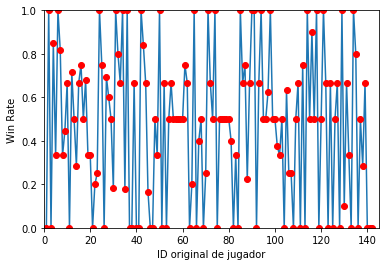

In [27]:
#Hacemos un plot de el winrate con respecto a los ID-s
r = estadistica[1:143,0]
t = estadistica[1:143,3]
plt.plot(r, t)

plt.plot(r, t, 'ro')
plt.axis([0, 145, 0, 1])
plt.ylabel('Win Rate')
plt.xlabel('ID original de jugador')
plt.show()
#vemos que ya tiene cara de una sigmoide solo hay que ordenar los ID-s con respecto a el winrate

In [21]:
#Definimos un nuevo dataframe llamado estadistica1 a partir de la matriz estadistica
estadistica1 = pd.DataFrame(estadistica)
#renombramos columnas del nuevo df
estadistica1.columns=['IDA','IDB','nos','WR']
#redefinimos nuestro df como el estadistica con los valores ordenados de menor a mayor del winrate
estadistica1 = estadistica1.sort_values(by=['WR'])
#reseteamos indices pero conservamos los viejos
estadistica1 = estadistica1.reset_index()
#Hacemos un array de estadistica1
wr = estadistica1.to_numpy()
#mostramos el array nuevo
wr

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [4.00000000e+01, 4.00000000e+01, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [4.10000000e+01, 4.10000000e+01, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [4.60000000e+01, 4.60000000e+01, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [4.70000000e+01, 4.70000000e+01, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [5.10000000e+01, 5.10000000e+01, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [5.30000000e+01, 5.30000000e+01, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [6.30000000e+01, 6.30000000e+01, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [6.60000000e+01, 6.60000000e+01, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [6.90000000e+01, 6.90000000e+01, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.41000000e+02, 1.4100

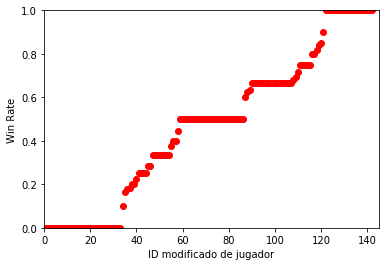

In [26]:
#dado que se agrego una nueva columna de indices, ahora nuestro win rate esta en la cuarta columna
#considerando columna 0 es la de los indices viejos
#definimos a t como nuestros winrates ya ordenados
t=wr[1:143,4]
#de lo anterior r iba de 1 hasta 142 por lo que podemos pensarlo de la siguiente manera: el id 1 corresponde a una
#persona cuyo winrate es el mas bajo, y asi sucesivamente hasta llegar al id 142 que sera de la persona con mayor winrate 
plt.plot(r, t, 'ro')
plt.axis([0, 145, 0, 1])
plt.ylabel('Win Rate')
plt.xlabel('ID modificado de jugador')
plt.show()
#vemos que la grafica es mucho mas parecida a una funcion sigmoide

Ya vimos que el winrate hace que tengamos un orden o da un orden de prioridad. Y de hecho esto se cumprueba con la ultima greafica donde se ve una buena aproximacion funcion sigmoide. Intuitivamente si enfrentamos a una persona cuyo winrate es cero contra una cuyo winrate es diferente de cero, entonces seguro va a ganar la segunda. En caso en el que una persona cuyo winrate sea 1 la enfrentamos a otra cuyo winrate sea menor que 0.5, entonces es mucho mas probable que la primera persona gane, de hecho la prediccion deberia ser asi.
A partir de aqui podemos tomar dos caminos: reasignar los ID's de tal forma que se preserve la funcion sigmoide o sustituir los ID's por el winrate. Hasta este punto ya se hizo lo segundo, por lo que se tomara ese camino. Aunque intuitivamente ambos caminos son analogos, ya que, en el primer caso, se define un orden.

La verosimilitud de atributos independientes se define como
$$L(\theta) = \prod_{i=1}^{n} P(Y=y^{(i)}|X=\vec{x}^{(i)})$$
Considerando que para la regresion logistica el resultado proviene de una distribucion de Bernoulli tenemos que $P(Y=y^{(i)}|X=x^{(i)})=\sigma (\theta ^{T}\vec{x})^{y} \cdot \left[ 1-\sigma (\theta ^{T}\vec{x})^{y}\right]^{1-y}$, donde $\sigma$ es la funcion sigmoide dada por: $\sigma(z) = \frac{1}{1+exp(-z)}$. Sustituyendo en la verosimilitud obtenemos que:
$$L(\theta) = \prod_{i=1}^{n} \sigma (\theta ^{T}\vec{x}^{(i)})^{y^{(i)}} \cdot \left[ 1-\sigma (\theta ^{T}\vec{x}^{(i)})\right]^{1-y^{(i)}}$$
al aplicar el logaritmo de la verosimilitud obtenemos la log-verosimilitud dada por:
$$LL(\theta) = \sum_{i=1}^{n} y^{(i)}log(\sigma (\theta ^{T}\vec{x}^{(i)})) + (1-y^{(i)}) log\left[ 1-\sigma (\theta ^{T}\vec{x}^{(i)})\right]$$
Una vez que se tiene la funcion de la log-verosimilitud, simplemente debemos elegir los valores de $\theta$ que las maximicen. Sabemos que la ecuacion de la primera derivada con respecto a $\theta_j$ no tiene solucion cerrada. Por ello es necesario usar el metodo del descenso del grandiente. La ecuacion de la derivada esta dada por
$$\frac{\partial}{\partial \theta_j}LL(\theta) = \sum_{i=1}^{n}\left[y^{(i)}- \sigma (\theta ^{T}\vec{x}^{(i)})\right]x_j^{(i)} $$

In [23]:
xw = matrizPrueba[:,0:2]
yw = matrizPrueba[:,2]
xww = matrizPrueba1[:,0:2]
yww = matrizPrueba1[:,2]

naiveCati = CategoricalNB(alpha=20)
naiveCati.fit(xw,yw)
prediccion = naiveCati.predict(xww)

#usamos la funcion accuracy_score entre las variables prediccion e yValid
#tal y como fueron definidos. Esta funcion muestra el porcentaje de clasificaciones buenas
#que hace el modelo con respecto a todas las muestras
print(accuracy_score(prediccion,yww))

0.7217391304347827
